In [68]:
# Load the packages
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from sklearn.linear_model import LinearRegression

# Customer Segmentation

In [69]:
df = pd.read_csv('C:/Users/DELL/Desktop/[RBAC 2023] Round 2 Dataset.csv')

In [70]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

last_date = df['TransactionDate'].max()

last_month = last_date.to_period('M')

df_filtered = df[df['TransactionDate'].dt.to_period('M') != last_month]

df = df_filtered

C:\Users\DELL\AppData\Local\Temp\ipykernel_13936\2015237899.py:5: UserWarning: Converting to Period representation will drop timezone information.
  last_month = last_date.to_period('M')
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [71]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1397197,1397197,1397197,Delivery,WEBSITE,2023-06-30 00:00:00+00:00,307336.0,1526475,Female,Yes,Hanoi
1397198,1397198,1397198,Take Away,STORE,2023-06-30 00:00:00+00:00,210907.0,48613,Female,No,Hanoi
1397199,1397199,1397199,Take Away,STORE,2023-06-30 00:00:00+00:00,237248.0,711050,Unknown,No,Hanoi
1397200,1397200,1397200,Delivery,CALL CENTER,2023-06-30 00:00:00+00:00,119985.0,2046935,Female,No,Ho Chi Minh City


In [72]:
# Calculate the Recency of the Customer
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TransactionDate'] = df['TransactionDate'].dt.tz_localize(None)

# print(df['TransactionDate'])

recent_purchase = df.groupby('CustomerID')['TransactionDate'].max()

now = datetime.now().replace(tzinfo=None)
recency = now - recent_purchase
recency = recency.dt.days

recency_df = pd.DataFrame({'CustomerID': recent_purchase.index, 'Recency': recency, 'Month': recent_purchase.dt.strftime('%Y-%m')})

print(recency_df)

            CustomerID  Recency    Month
CustomerID                              
0                    0      689  2021-12
1                    1      616  2022-03
8                    8      250  2023-03
14                  14      170  2023-05
16                  16      423  2022-09
...                ...      ...      ...
2174066        2174066      314  2023-01
2174072        2174072      344  2022-12
2174073        2174073      274  2023-02
2174075        2174075      338  2022-12
2174083        2174083      758  2021-10

[718050 rows x 3 columns]


In [73]:
# Calculate the Frequency of the customers
frequency = df.groupby('CustomerID')['TransactionDate'].count()

frequency_df = pd.DataFrame({'CustomerID': frequency.index, 'Frequency': frequency})

print(frequency_df)

            CustomerID  Frequency
CustomerID                       
0                    0          1
1                    1          1
8                    8          2
14                  14          1
16                  16          1
...                ...        ...
2174066        2174066          1
2174072        2174072          3
2174073        2174073          1
2174075        2174075          1
2174083        2174083          1

[718050 rows x 2 columns]


In [74]:
# Monetary of the customer
total_spent_per_customer = df.groupby('CustomerID')['SalesAmount'].sum()

print(total_spent_per_customer)

CustomerID
0           411663.0
1           105503.0
8          1941696.0
14          267607.0
16          286558.0
             ...    
2174066     143685.0
2174072     953618.0
2174073     514503.0
2174075     262489.0
2174083     185271.0
Name: SalesAmount, Length: 718050, dtype: float64


In [75]:
# RFM Table"
RMF_Table = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': total_spent_per_customer})

print(RMF_Table)

            Recency  Frequency   Monetary
CustomerID                               
0               689          1   411663.0
1               616          1   105503.0
8               250          2  1941696.0
14              170          1   267607.0
16              423          1   286558.0
...             ...        ...        ...
2174066         314          1   143685.0
2174072         344          3   953618.0
2174073         274          1   514503.0
2174075         338          1   262489.0
2174083         758          1   185271.0

[718050 rows x 3 columns]


In [76]:
quantiles = RMF_Table.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.2: 236.0, 0.4: 366.0, 0.6: 507.0, 0.8: 638.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Monetary': {0.2: 177874.0,
  0.4: 266509.60000000003,
  0.6: 388299.39999999997,
  0.8: 734265.2000000004}}

In [77]:
# RFM Segmentation
rfmSegmentation = RMF_Table

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation
                                                                                       

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
0,689,1,411663.0,1,1,4,114
1,616,1,105503.0,2,1,1,211
8,250,2,1941696.0,4,4,5,445
14,170,1,267607.0,5,1,3,513
16,423,1,286558.0,3,1,3,313
...,...,...,...,...,...,...,...
2174066,314,1,143685.0,4,1,1,411
2174072,344,3,953618.0,4,5,5,455
2174073,274,1,514503.0,4,1,4,414


In [78]:
def classify_rfm(recency, frequency, monetary):
    if recency >= 4 and (frequency + monetary) >= 8:
        return 'Champions'
    elif 2 <= recency <= 5 and 3 <= (frequency + monetary) <= 8:
        return 'Loyal Customers'
    elif 3 <= recency <= 5 and 1 <= (frequency + monetary) <= 4:
        return 'Potential Loyalist'
    elif recency >= 4 and (frequency + monetary) <= 2:
        return 'Recent Customers'
    elif 3 <= recency <= 4 and (frequency + monetary) <= 2:
        return 'Promising'
    elif 2 <= recency <= 3 and 2 <= (frequency + monetary) <= 4:
        return 'Customers Needing Attention'
    elif 2 <= recency <= 3 and (frequency + monetary) <= 2:
        return 'About To Sleep'
    elif recency <= 2 and 2 <= (frequency + monetary) <= 7:
        return 'At Risk'
    elif recency <= 1 and (frequency + monetary) >= 6:
        return 'Can’t Lose Them'
    elif 1 <= recency <= 2 and 1 <= (frequency + monetary) <= 4:
        return 'Hibernating'
    else:
        return 'Lost'

rfmSegmentation['Segment'] = rfmSegmentation.apply(lambda x: classify_rfm(x['R_Quartile'], x['F_Quartile'], x['M_Quartile']), axis=1)
rfmSegmentation['Month'] = recency_df['Month']

print(rfmSegmentation.head())

rfmSegmentation.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/rfmSegmentation.csv')

            Recency  Frequency   Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                      
0               689          1   411663.0           1           1           4   
1               616          1   105503.0           2           1           1   
8               250          2  1941696.0           4           4           5   
14              170          1   267607.0           5           1           3   
16              423          1   286558.0           3           1           3   

           RFMClass                      Segment    Month  
CustomerID                                                 
0               114                      At Risk  2021-12  
1               211  Customers Needing Attention  2022-03  
8               445                    Champions  2023-03  
14              513              Loyal Customers  2023-05  
16              313              Loyal Customers  2022-09  


In [79]:
rfmSegmentation[rfmSegmentation['Segment'] == 'Loyal Customers']

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Month
CustomerID,,,,,,,,,
14,170,1,267607.0,5,1,3,513,Loyal Customers,2023-05
16,423,1,286558.0,3,1,3,313,Loyal Customers,2022-09
25,245,3,254058.0,4,5,2,452,Loyal Customers,2023-03
26,365,1,269591.0,4,1,3,413,Loyal Customers,2022-11
31,167,1,333110.0,5,1,3,513,Loyal Customers,2023-05
...,...,...,...,...,...,...,...,...,...
2174047,250,1,643454.0,4,1,4,414,Loyal Customers,2023-03
2174050,376,1,182623.0,3,1,2,312,Loyal Customers,2022-11
2174059,249,2,337809.0,4,4,3,443,Loyal Customers,2023-03


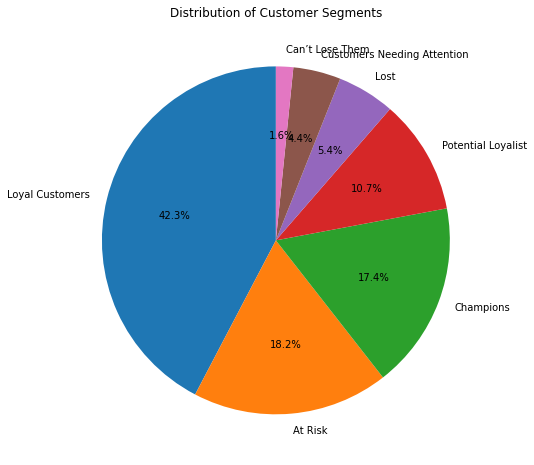

In [80]:
segment_counts = rfmSegmentation['Segment'].value_counts()

segment_counts.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/segment_counts.csv')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Segments')
plt.show()

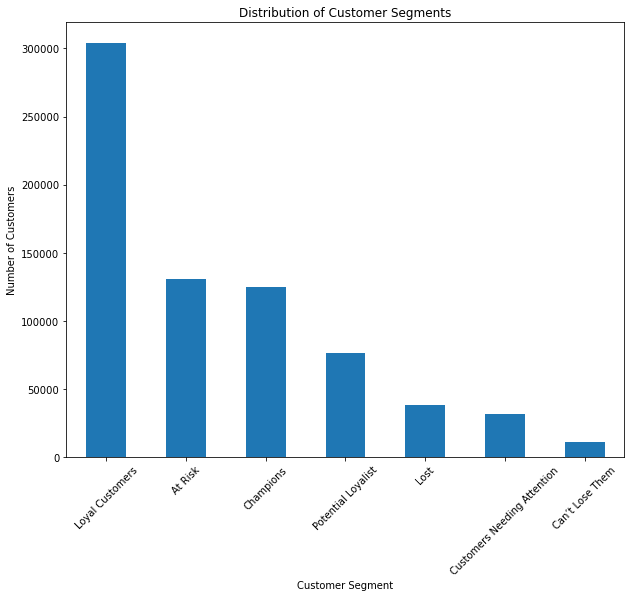

In [81]:
segment_counts = rfmSegmentation['Segment'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 8))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [82]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

first_order_date = df.groupby('CustomerID')['TransactionDate'].min()
last_order_date = df.groupby('CustomerID')['TransactionDate'].max()

customer_lifespan_days = (last_order_date - first_order_date).dt.days

average_sale_value_per_customer = df.groupby('CustomerID')['SalesAmount'].mean()

transactions_per_customer = df.groupby('CustomerID').size()

number_of_years = df['TransactionDate'].dt.year.nunique()
average_transactions_per_customer_per_year = transactions_per_customer / number_of_years


customer_value = average_sale_value_per_customer * average_transactions_per_customer_per_year

customer_lifetime_value = customer_value * (customer_lifespan_days / 365)

clv_df = pd.DataFrame({
    'CustomerID': customer_lifetime_value.index,
    'CustomerLifetimeValue': customer_lifetime_value.values
})

clv_df.to_csv('customer_lifetime_value.csv', index=False)

print(clv_df)


        CustomerID  CustomerLifetimeValue
0                0               0.000000
1                1               0.000000
2                8          425577.205479
3               14               0.000000
4               16               0.000000
...            ...                    ...
718045     2174066               0.000000
718046     2174072           71412.489498
718047     2174073               0.000000
718048     2174075               0.000000
718049     2174083               0.000000

[718050 rows x 2 columns]


# Churn Rate

In [83]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')

monthly_active_customers = df.groupby('Month')['CustomerID'].nunique()

previous_month_active = monthly_active_customers.shift(1)

active_customers_set = df.groupby('Month')['CustomerID'].apply(set)

# --------------------------------------------------
first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('M')

new_customers = first_transaction.groupby(first_transaction).size()
# --------------------------------------------------

churned_customers = active_customers_set.shift(1) - active_customers_set

churned_customers_count = churned_customers.apply(lambda x: len(x) if isinstance(x, set) else 0)

churn_rate = (churned_customers_count - new_customers) / previous_month_active

churn_rate.fillna(0, inplace=True)

print(churn_rate)

Month
2021-10    0.000000
2021-11    0.060734
2021-12   -0.034601
2022-01    0.124180
2022-02    0.203219
2022-03    0.212125
2022-04    0.323675
2022-05    0.210697
2022-06    0.263326
2022-07    0.314098
2022-08    0.355371
2022-09    0.412587
2022-10    0.345557
2022-11    0.442915
2022-12    0.313220
2023-01    0.235825
2023-02    0.520138
2023-03    0.324160
2023-04    0.418709
2023-05    0.385151
2023-06    0.391216
Freq: M, dtype: float64


# Linear Regression to Predict the monthly Churn Rate in the next 6 months


[0.48862475 0.50784041 0.52705606 0.54627172 0.56548738 0.58470304]


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


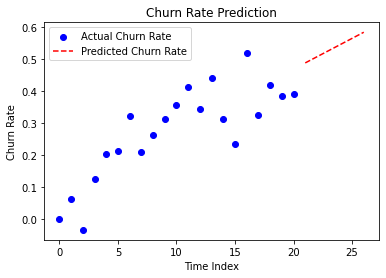

In [84]:
# ------------------------------------------Linear Regression----------------------------------------

# Add the column 'ChurnRate'
churn_rate_df = churn_rate.reset_index(name='ChurnRate')

# Add a numerical index to the DataFrame to represent time for the regression model
churn_rate_df['TimeIndex'] = np.arange(len(churn_rate_df))

X = churn_rate_df[['TimeIndex']]  
y = churn_rate_df['ChurnRate'].values 

model = LinearRegression()
model.fit(X, y)

future_periods = 6
future_index = np.arange(len(X), len(X) + future_periods).reshape(-1, 1)
future_churn_rate = model.predict(future_index)

print(future_churn_rate)

plt.scatter(churn_rate_df['TimeIndex'], churn_rate_df['ChurnRate'], color='blue', label='Actual Churn Rate')

plt.plot(np.arange(len(X), len(X) + future_periods), future_churn_rate, color='red', linestyle='--', label='Predicted Churn Rate')

plt.xlabel('Time Index')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Prediction')
plt.legend()
plt.show()